<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-2-Applied-Modeling/blob/master/Bo_Warburton_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

# The Data: COB Sales and HUNS at Five KFC Stores from 2018 and 2019

## The Setup

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

## The Reading and Cleaning
- Drop columns
- Lower case
- Replace space with underscore
- Spell check
- Outliers
- Negative numbers
- Null values

Note to self: check with the business about negative numbers. Maybe that is a correct number for some reason. Shouldn't make assumptions.

Nothing here should create a risk of overfitting or creating an incorrect model.

In [0]:
# Uncompress data if necessary and change directory to where uncompressed
# import tarfile
# tarfile.open('instacart_online_grocery_shopping_2017_05_01.tar.gz').extractall()
# %cd instacart_2017_05_01

In [0]:
# If there are several files in this dataset,
# Loop through files ending in csv and print filename, shape, and first rows
# Using helpful library "glob" here; you can also use import os
# from glob import glob
# for filename in glob('*.csv'):
#     print(filename)

# import pandas as pd
# from IPython.display import display

# def preview():
#   for filename in glob('*.csv'):
#     df = pd.read_csv(filename)
#     print(filename)
#     print(f'Shape: {df.shape}')
#     display(df.head())

# preview()

In [0]:
# Each row is Chicken on Bone (COB) and Heads Used but Not Sold (HUNS) for one date at one KFC
import pandas as pd
data_file = 'https://github.com/BoWarburton/heads-used-not-sold/raw/master/huns.csv'
df_original = pd.read_csv(data_file)

In [13]:
df_original.head()

,StoreCode,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
0,C750001,20180221,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,20180222,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,20180223,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,20180224,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,20180225,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [14]:
# Good dataset with 3,530 observations across 15 features
df_original.shape

(3530, 15)

In [16]:
# The target is ChickenHuns
df_original.describe()

,Date,ChickenHuns,1pc,2 pc,3 pc,4 pc,8pc,8pc Meal,12 pc,12 pc Meal,16 pc,16 pc Meal,20 pc,20 pc Meal
count,3.530000e+03,3530.000000,3530.000000,3530.00000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,2.018706e+07,17.155524,13.025779,41.30085,6.333144,2.237960,6.272238,2.341643,5.910198,1.699433,3.461190,0.987252,0.273088,0.322380
std,5.988819e+03,36.131985,8.964851,15.46182,5.611545,2.649557,5.881116,1.757144,3.246575,1.475991,2.381875,1.212996,0.598653,0.778198
min,2.018022e+07,-548.500000,0.000000,3.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.018082e+07,10.750000,7.000000,30.00000,2.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.500000,13.000000,40.00000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019082e+07,21.000000,19.000000,51.00000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,2.000000,0.000000,0.000000
max,2.020022e+07,1053.500000,54.000000,110.00000,38.000000,15.000000,34.000000,14.000000,22.000000,9.000000,22.000000,14.000000,6.000000,11.000000


In [17]:
df_original.dtypes

StoreCode       object
Date             int64
ChickenHuns    float64
1pc              int64
2 pc             int64
3 pc             int64
4 pc             int64
8pc              int64
8pc Meal         int64
12 pc            int64
12 pc Meal       int64
16 pc            int64
16 pc Meal       int64
20 pc            int64
20 pc Meal       int64
dtype: object

In [51]:
# Drop columns
df = df_original
# drop_columns = ['']
# df = df_dcf.drop(columns = drop_columns)
df.shape

(3530, 15)

In [52]:
# Fix column names
# Put column names in lower case
df.columns = map(str.lower, df.columns)
df.describe()

,date,chickenhuns,1pc,2 pc,3 pc,4 pc,8pc,8pc meal,12 pc,12 pc meal,16 pc,16 pc meal,20 pc,20 pc meal
count,3.530000e+03,3530.000000,3530.000000,3530.00000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000
mean,2.018706e+07,17.155524,13.025779,41.30085,6.333144,2.237960,6.272238,2.341643,5.910198,1.699433,3.461190,0.987252,0.273088,0.322380
std,5.988819e+03,36.131985,8.964851,15.46182,5.611545,2.649557,5.881116,1.757144,3.246575,1.475991,2.381875,1.212996,0.598653,0.778198
min,2.018022e+07,-548.500000,0.000000,3.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.018082e+07,10.750000,7.000000,30.00000,2.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.500000,13.000000,40.00000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019082e+07,21.000000,19.000000,51.00000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,2.000000,0.000000,0.000000
max,2.020022e+07,1053.500000,54.000000,110.00000,38.000000,15.000000,34.000000,14.000000,22.000000,9.000000,22.000000,14.000000,6.000000,11.000000


In [53]:
df.dtypes

storecode       object
date             int64
chickenhuns    float64
1pc              int64
2 pc             int64
3 pc             int64
4 pc             int64
8pc              int64
8pc meal         int64
12 pc            int64
12 pc meal       int64
16 pc            int64
16 pc meal       int64
20 pc            int64
20 pc meal       int64
dtype: object

In [0]:
# Remove or replace spaces in column names with underscores
df = df.rename(columns = {'storecode':'store_code',
                          'chickenhuns':'huns',
                          '2 pc':'2pc',
                          '3 pc':'3pc',
                          '4 pc':'4pc',
                          '8pc meal':'8pc_meal',
                          '12 pc':'12pc',
                          '12 pc meal':'12pc_meal',
                          '16 pc':'16pc',
                          '16 pc meal':'16pc_meal',
                          '20 pc':'20pc',
                          '20 pc meal':'20pc_meal'
                          })

In [55]:
df.head()

,store_code,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal
0,C750001,20180221,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,20180222,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,20180223,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,20180224,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,20180225,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [0]:
# IDEA——Get separate table with store name, just to practice joins for my ChickenHuns
# so orders.csv is what I got from Jeff, and I will make stores.csv with features storecode, storename
# train = pd.merge(orders, stores, left_on='product_id', right_on='product_id')

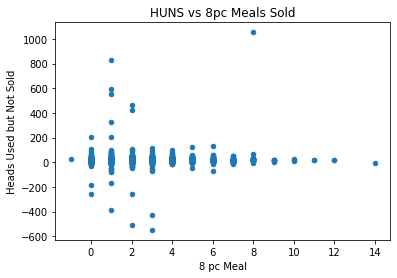

In [57]:
(df
 .plot
 .scatter(x='8pc_meal', y='huns')
 .set(title='HUNS vs 8pc Meals Sold',
      xlabel='8 pc Meal',
      ylabel='Heads Used but Not Sold')
);

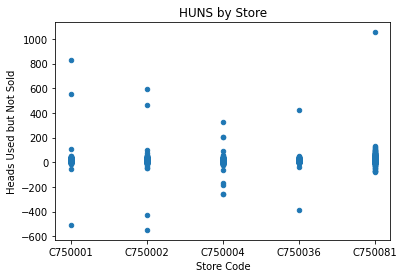

In [58]:
(df
 .plot
 .scatter(x='store_code', y='huns')
 .set(title='HUNS by Store',
      xlabel='Store Code',
      ylabel='Heads Used but Not Sold')
);

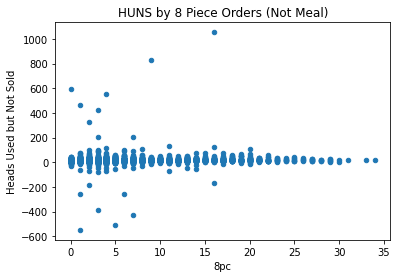

In [59]:
(df
 .plot
 .scatter(x='8pc', y='huns')
 .set(title='HUNS by 8 Piece Orders (Not Meal)',
      xlabel='8pc',
      ylabel='Heads Used but Not Sold')
);

In [60]:
df['huns'].value_counts()

 12.875    37
 14.625    35
 14.375    33
 10.000    30
 15.875    29
           ..
 2.250      1
-5.250      1
-9.500      1
-10.000     1
 57.375     1
Name: huns, Length: 500, dtype: int64

In [86]:
df.huns.isnull().sum()

0

In [61]:
df['huns'].describe().T

count    3530.000000
mean       17.155524
std        36.131985
min      -548.500000
25%        10.750000
50%        15.500000
75%        21.000000
max      1053.500000
Name: huns, dtype: float64

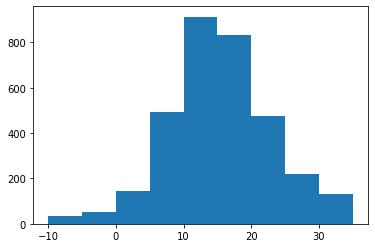

In [63]:
plt.hist(df['huns'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35]);

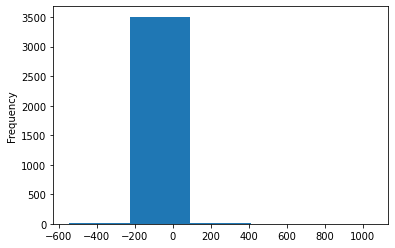

In [64]:
df['huns'].plot.hist(bins=5)

Text(0.5, 1.0, '20pc Meals')

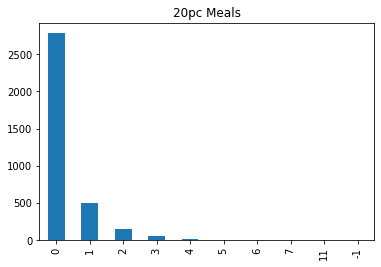

In [65]:
df['20pc_meal'].value_counts(sort=True).plot.bar().set_title('20pc Meals')

In [0]:
# Only keep rows where 0 <= huns <= 35
# Remove rows where 8pc_meal, 20pc, or 20pc_meal < 0
import numpy as np
df = df[(df['huns'] >= 0) &
        (df['huns'] <= 35) &
        (df['8pc_meal'] >= 0) &
        (df['20pc'] >= 0) &
        (df['20pc_meal'] >=0)]

In [67]:
df.describe()

,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal
count,3.201000e+03,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000
mean,2.018715e+07,15.894916,13.185255,41.138082,6.344892,2.237738,6.233052,2.317088,5.865355,1.679163,3.430490,0.974695,0.268041,0.322712
std,5.994632e+03,6.938438,9.031181,15.557584,5.555044,2.627028,5.875483,1.733057,3.247353,1.475583,2.350584,1.208427,0.584706,0.785342
min,2.018022e+07,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.018082e+07,11.000000,7.000000,30.000000,2.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,2.019022e+07,15.250000,13.000000,40.000000,5.000000,1.000000,4.000000,2.000000,5.000000,1.000000,3.000000,1.000000,0.000000,0.000000
75%,2.019083e+07,20.125000,19.000000,51.000000,9.000000,4.000000,9.000000,3.000000,8.000000,2.000000,5.000000,1.000000,0.000000,0.000000
max,2.020022e+07,35.000000,54.000000,110.000000,38.000000,15.000000,34.000000,12.000000,22.000000,9.000000,22.000000,14.000000,5.000000,11.000000


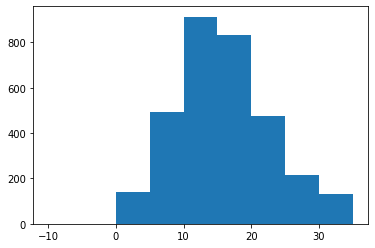

In [68]:
from matplotlib import pyplot as plt
plt.hist(df['huns'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35])
plt.show();

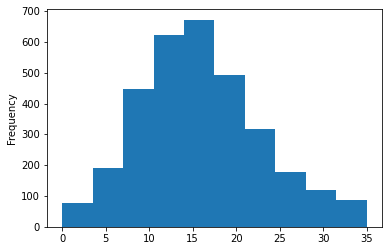

In [69]:
df['huns'].plot.hist()

In [74]:
# Date column is an int of format YYYYMMDD
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df.head()

,store_code,date,huns,1pc,2pc,3pc,4pc,8pc,8pc_meal,12pc,12pc_meal,16pc,16pc_meal,20pc,20pc_meal
0,C750001,2018-02-21,20.625,23,61,10,0,29,1,7,1,4,0,1,1
1,C750001,2018-02-22,18.125,19,78,5,0,23,3,14,0,9,1,0,0
2,C750001,2018-02-23,14.875,16,68,8,0,34,1,10,2,7,1,1,0
3,C750001,2018-02-24,25.875,17,48,4,0,29,2,9,1,5,1,0,0
4,C750001,2018-02-25,24.500,21,43,6,0,27,3,14,1,5,1,0,0


In [75]:
df.dtypes

store_code            object
date          datetime64[ns]
huns                 float64
1pc                    int64
2pc                    int64
3pc                    int64
4pc                    int64
8pc                    int64
8pc_meal               int64
12pc                   int64
12pc_meal              int64
16pc                   int64
16pc_meal              int64
20pc                   int64
20pc_meal              int64
dtype: object

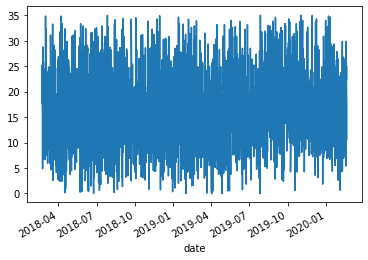

In [76]:
# ChickenHuns as time series
df.set_index('date')['huns'].plot()

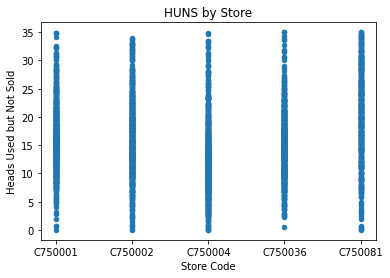

In [78]:
(df
 .plot
 .scatter(x='store_code', y='huns')
 .set(title='HUNS by Store',
      xlabel='Store Code',
      ylabel='Heads Used but Not Sold')
);

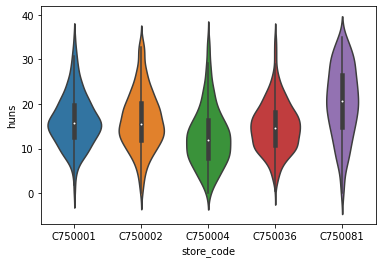

In [81]:
sns.violinplot(x='store_code', y='huns', data=df);

In [0]:
huns = df.copy()

In [83]:
huns['huns'].describe().T

count    3201.000000
mean       15.894916
std         6.938438
min         0.000000
25%        11.000000
50%        15.250000
75%        20.125000
max        35.000000
Name: huns, dtype: float64

In [84]:
huns['huns'].value_counts()

12.875    37
14.625    35
14.375    33
10.000    30
15.750    29
          ..
29.500     1
32.500     1
1.375      1
2.125      1
31.625     1
Name: huns, Length: 277, dtype: int64

## The Data Exploration, v1.0

In [0]:
# Pandas profiling


In [88]:
huns.store_code.value_counts()

C750036    704
C750002    681
C750004    674
C750001    657
C750081    485
Name: store_code, dtype: int64

# The Problem

## The Target: ChickenHuns
Heads Used but Not Sold (HUNS) is a measure of money lost and food wasted.

Variations on this target are:
- Today
- Tomorrow
- By restaurant
- Total across all restaurants

## The Problem: Regression
ChickenHuns is a continuous, numeric variable. Therefore, this is a regressions problem.

But would it be worthwhile to great ChickenHuns as categorical? Examples would be yes/no or none/little/much.

Answer: whatever gives you the best answer based on applicable success criteria.

Logistic regression
Decision trees

## The Baseline: Mean

In [101]:
print(f'Average HUNS across all stores and all dates: {huns.huns.mean():.2f}')
print(f'Average HUNS at C750036: {huns[huns["store_code"] == "C750036"].huns.mean():.2f}')
print(f'Average HUNS at C750002: {huns[huns["store_code"] == "C750002"].huns.mean():.2f}')
print(f'Average HUNS at C750004: {huns[huns["store_code"] == "C750004"].huns.mean():.2f}')
print(f'Average HUNS at C750001: {huns[huns["store_code"] == "C750001"].huns.mean():.2f}')
print(f'Average HUNS at C750081: {huns[huns["store_code"] == "C750081"].huns.mean():.2f}')

Average HUNS across all stores and all dates: 15.89
Average HUNS at C750036: 14.97
Average HUNS at C750002: 16.30
Average HUNS at C750004: 12.72
Average HUNS at C750001: 16.37
Average HUNS at C750081: 20.44


## The Distribution: Pretty normal

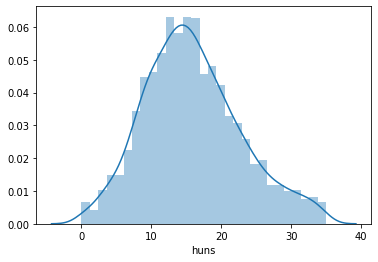

In [102]:
import seaborn as sns
sns.distplot(df['huns']);

## The Evaluation Metric: R^2
Evaluation metric(s) for this regression problem will be mean absolute error.

In [0]:
# Baseline is average
print(f'Baseline average HUNS is: {df["ChickenHuns"].mean()*100:.2f}')

Baseline average HUNS is: 1715.55


## The Observations: Exclude Outliers; Time-Based Split
I'd rather not use date, because this time period includes management and other changes. Possibly I should try random and time based splits.

Then again, not using date might incur the problem of time travel.

Try it both ways and see.

At first glance, it appears that HUNS is roughly normal in a range from -548.5 to 1053.5. But this looks incorrect: neither negative nor very high numbers make sense. Get rid of negative numbers and very high numbers.

The same goes for other features, if necessary.

# The Visualisations: or Data Exploration 2.0

## The Confusion Matrix

## The Double Partial Dependence Plot

## The Log Transform

# The Data Wrangling and Feature Engineering
- All meals
- Yesterday's ChickenHuns
- Yesterday's meals
- Last week, month, etc. (crackdown by regional manager?)
- Weekday/weekend (busier? different manager?)
- Modulus of total pieces divided by eight (a head of chicken is eight pieces)
- Store number (effect of management)
- Ratio of 24pc to 8pc (staff anticipating 24pc but disappointed?)
- Rolling averages of 24pc (inversely related to HUNS?)

# The Train/Test Split

# The Models

# The Fit and Trained Model

# The Pickling of Pipeline